In [13]:
import os
os.mkdir('Bank')
os.mkdir('Bank_Admin')

In [14]:
import os
import json
import time
from datetime import datetime
from IPython.display import clear_output
class Bank:
    def __repr__(self):
        return f"Available Account Numbers {os.listdir('Bank')}"
    def sign_up(self,user_name,password,balance):
        self.user_name=user_name
        self.password=password
        self.balance=balance
        acc_no=None
        data=os.listdir('Bank')
        if data==[]:
            acc_no='1000'
        else:      
            acc_no=str(int(max(data))+1)
        data={'name':self.user_name,'Balance':self.balance,'Password':self.password}
        fp=open(f'Bank/{acc_no}','w')
        json.dump(data,fp)
        fp.close()
        time.sleep(3)
        print("User Successfully Added")
        print(f"Account_number is {acc_no} use it for Log_In")
        clear_output()
    def login(self,id,password):
        data=os.listdir('Bank')
        c_t=None
        if id in data:
            now = datetime.now()
            c_t = now.strftime("%H:%M:%S")
            fp=open(f'Bank/{id}','r+')
            value=json.load(fp)
            if value['Password']==password:
                option=1
                while(option!=6):
                    print('1 :- Debit Amount')
                    print('2 :- Credit Amount')
                    print('3 :- Check Balance')
                    print('4 :- Account Information')
                    print('5 :- Update Account Info.')
                    print('6 :- Log out')
                    option=int(input())
                    if option == 1:
                        amt=int(input("Enter Amount to be Debited"))
                        if value['Balance']<amt:
                            print("Insufficient Balance")
                        elif amt<1:
                            print("Enter Valid Amount To be debited")
                        else:
                            value['Balance']-=amt
                    elif option==2:
                        amt=int(input("Enter Amount to be credited"))
                        if amt:
                            value['Balance']+=amt
                        else:
                            print("Please Enter Valid Amount to be Credited")
                    elif option ==3:
                        print(f"Available Balance in your account is {value['Balance']}")
                    elif option == 4:
                        print(f"UserName is {value['name']}")
                        print(f"Password is {value['Password']}")
                        print(f"Account Balance is {value['Balance']}")
                    elif option ==5:
                        print('1 :- Update Account User_name')
                        print('2 :- Update Account Password')
                        choice=int(input())
                        if choice ==1:
                              name=input("Enter New User_Name")
                              value['name']=name
                              print('Records Updated')
                        elif choice ==2:
                            password=input("Enter New Password")
                            value['Password']=password
                            print('Records Updated')
                else:
                    li=[]
                    now1 = datetime.now()
                    c_t2 = now1.strftime("%H:%M:%S")
                    li.append({id:{'Login':f'{c_t[:2]}:{c_t[-5:-3]}:{c_t[-2:]}','Logout':f'{c_t2[:2]}:{c_t2[-5:-3]}:{c_t2[-2:]}'}})         
                    admin=open('Bank_Admin/time_info.json','a+')
                    json.dump(li,admin)
                    admin.close()
                    fp.seek(0)
                    json.dump(value,fp)
                    print("Logging Out")
                    fp.truncate()
                    fp.close()
                    time.sleep(3)
                    clear_output()
                    return None
            else:
                    print("You've entered wrong password please try again!!!")
                    fp.close()
                    return None
        else:
            print('No Such Record Exist Prefer Doing sign up')
            return None

In [15]:
def main():
    li=['1 :- Login','2 :- Sign_Up','3 :- Exit']
    ch=1
    while ch!=3:
        for i in li:
            print(i)
        ch=int(input("Select from the options above"))
        if ch==1:
            acc_no=input("Enter Acc_No to access your account")
            password=input("Enter Password")
            #acc_no=acc_no+'.json'
            temp_obj=Bank()
            temp_obj.login(acc_no,password)
        elif ch==2:
            user_Name=input("Enter user Name")
            password=input("Enter Password")
            balance=int(input("Enter Initial Balance"))
            temp_obj=Bank()
            temp_obj.sign_up(user_Name,password,balance)
    else:
        print("Thank You for using our Services have a nice day :-)")

In [16]:
main()

1 :- Login
2 :- Sign_Up
3 :- Exit
Select from the options above3
Thank You for using our Services have a nice day :-)


In [25]:
b=Bank()

In [26]:
print(b)

Available Account Numbers ['1000']


In [4]:
import matplotlib.pyplot as plt

In [5]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotTool',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_auto_draw_if_interactive',
 '_autogen_docstring',
 '_backend_mod',
 '_get_running_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_setp',
 '_setup_pyplot_info_docstrings',
 '_show',
 '_string_to_bool',
 'acorr',
 'angle_spec

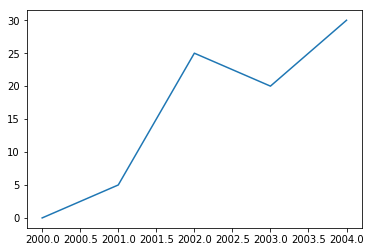

In [10]:
a=[0,5,25,20,30]
b=[2000,2001,2002,2003,2004]
plt.plot(b,a)
plt.show()

[{'1000': {'Login': '12:30:20', 'Logout': '12:30:30'}}]
12


ValueError: x and y must have same first dimension, but have shapes (7,) and (1,)

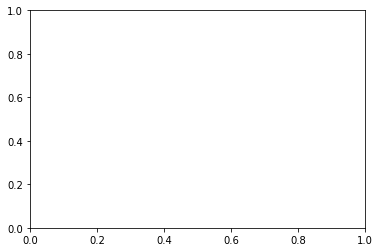

In [23]:
import json
import matplotlib.pyplot as plt
fp=open('Bank_Admin/time_info.json')
time=[1,5,9,13,17,21,24]
data=json.load(fp)
print(data)
login_time=int(data[0]['1000']['Login'][:2])
print(login_time)

fp.close()